In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install kaggle

In [ ]:
%cd /content/gdrive/MyDrive/content/sample_data/

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/content/sample_data/'
/content


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/tmp/"

In [ ]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

api_token = {"username":"bibitpamungkas","key":"0b4a500fd9a858ee152de296398002ab"}
import json
import zipfile
import os
with open('/tmp/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /tmp/kaggle.json

In [ ]:
!kaggle datasets download -d jtiptj/chest-xray-pneumoniacovid19tuberculosis

100% 1.74G/1.74G [00:27<00:00, 85.8MB/s]



In [ ]:
# Ekstrak dataset

import os
import zipfile

os.makedirs('/tmp/chest-xray-pneumoniacovid19tuberculosis')

local_zip = '/content/chest-xray-pneumoniacovid19tuberculosis.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/chest-xray-pneumoniacovid19tuberculosis')
zip_ref.close()

In [ ]:
import os
base_dir = '/tmp/chest-xray-pneumoniacovid19tuberculosis'
train = os.path.join(base_dir,'train')
validation = os.path.join(base_dir,'val')

c19_tr = os.path.join(train,'COVID19')
c19_va = os.path.join(validation,'COVID19')

nr_tr = os.path.join(train,'NORMAL')
nr_va = os.path.join(validation,'NORMAL')

pn_tr = os.path.join(train,'PNEUMONIA')
pn_va = os.path.join(validation,'PNEUMONIA')

tb_tr = os.path.join(train,'TURBERCULOSIS')
tb_va = os.path.join(validation,'TURBERCULOSIS')

#file training dan validation
file_train_c19 = os.listdir(c19_tr)
file_validation_c19 = os.listdir(c19_va)
file_train_nr = os.listdir(nr_tr)
file_validation_nr = os.listdir(nr_va)
file_train_pn = os.listdir(pn_tr)
file_validation_pn = os.listdir(pn_va)
file_train_tb = os.listdir(tb_tr)
file_validation_tb = os.listdir(tb_va)

#Print jumlah data training dan validation
print("Data COVID19 Train : " + str(len(file_train_c19)))
print("Data COVID19 Validation : " + str(len(file_validation_c19)))
print("Data NORMAL Train : " + str(len(file_train_nr)))
print("Data NORMAL Validation : " + str(len(file_validation_nr)))
print("Data PNEUMONIA Train : " + str(len(file_train_pn)))
print("Data PNEUMONIA Validation : " + str(len(file_validation_pn)))
print("Data TURBERCULOSIS Train : " + str(len(file_train_tb)))
print("Data TURBERCULOSIS Validation : " + str(len(file_validation_tb)))

Data COVID19 Train : 460
Data COVID19 Validation : 10
Data NORMAL Train : 1341
Data NORMAL Validation : 8
Data PNEUMONIA Train : 3875
Data PNEUMONIA Validation : 8
Data TURBERCULOSIS Train : 650
Data TURBERCULOSIS Validation : 12


In [ ]:
# Cek penamaan image yang ada di folder train_cats_dir dan train_dogs_dir
print((file_train_c19)[:10])
print((file_train_nr)[:10])
print((file_train_pn)[:10])
print((file_train_tb)[:10])

['COVID19(277).jpg', 'COVID19(455).jpg', 'COVID19(100).jpg', 'COVID19(354).jpg', 'COVID19(268).jpg', 'COVID19(34).jpg', 'COVID19(444).jpg', 'COVID19(365).jpg', 'COVID19(22).jpg', 'COVID19(151).jpg']
['IM-0335-0001.jpeg', 'NORMAL2-IM-0852-0001.jpeg', 'NORMAL2-IM-0395-0001.jpeg', 'NORMAL2-IM-0959-0001.jpeg', 'NORMAL2-IM-1052-0001.jpeg', 'IM-0531-0001.jpeg', 'NORMAL2-IM-0867-0001.jpeg', 'IM-0447-0001.jpeg', 'NORMAL2-IM-0535-0001.jpeg', 'IM-0168-0001.jpeg']
['person1107_bacteria_3048.jpeg', 'person316_virus_641.jpeg', 'person315_bacteria_1465.jpeg', 'person422_virus_868.jpeg', 'person1566_bacteria_4099.jpeg', 'person1108_bacteria_3049.jpeg', 'person1399_virus_2402.jpeg', 'person413_bacteria_1829.jpeg', 'person916_bacteria_2841.jpeg', 'person93_virus_175.jpeg']
['Tuberculosis-616.png', 'Tuberculosis-116.png', 'Tuberculosis-445.png', 'Tuberculosis-330.png', 'Tuberculosis-607.png', 'Tuberculosis-125.png', 'Tuberculosis-278.png', 'Tuberculosis-524.png', 'Tuberculosis-196.png', 'Tuberculosis-35

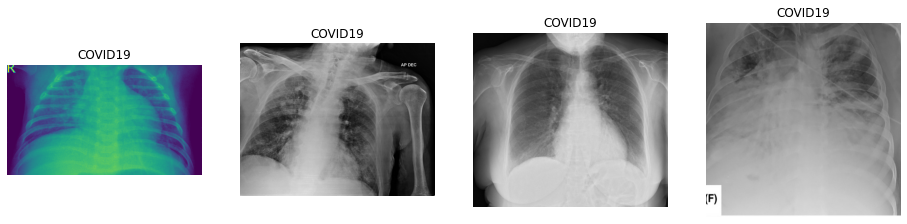

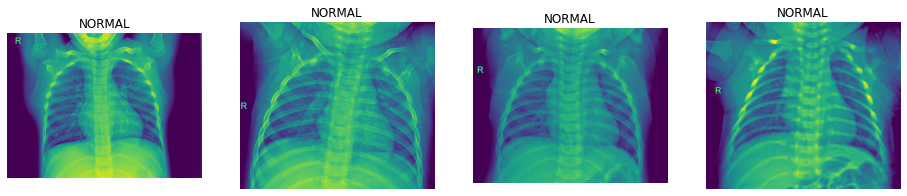

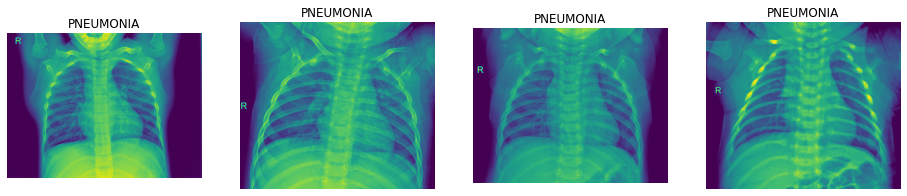

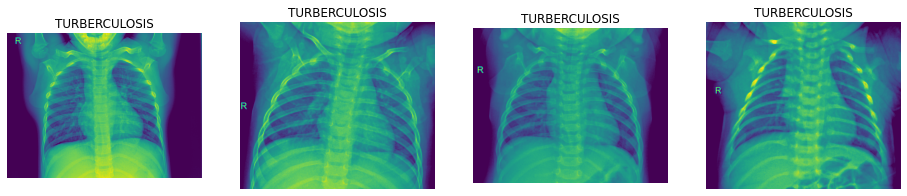

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

fname1 = [os.path.join(c19_tr,fname) for fname in file_train_c19[:4] ]
fname2 = [os.path.join(nr_tr,fname) for fname in file_train_nr[:4] ]
fname3 = [os.path.join(pn_tr,fname) for fname in file_train_pn[:4] ]
fname4 = [os.path.join(tb_tr,fname) for fname in file_train_tb[:4] ]

ncolu = 4
nrow = 4
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('COVID19')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 4
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('NORMAL')
    plt.imshow(img)
    
plt.show()

ncolu = 4
nrow = 4
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('PNEUMONIA')
    plt.imshow(img)
    
plt.show()

ncolu = 4
nrow = 4
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('TURBERCULOSIS')
    plt.imshow(img)
    
plt.show()

In [ ]:
import cv2
import numpy as np

#gather data train
train_data = []
train_label = []

for r, d, f in os.walk(train) :
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []

for r, d, f in os.walk(validation) :
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation label = ", val_label.shape)

Train Data =  (460, 150, 150, 3)
Train label =  (460,)
Validation Data =  (10, 150, 150, 3)
Validation label =  (10,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [94 94 94]
Data setelah di-normalisasi  [0.36862746 0.36862746 0.36862746]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("label sebelum di-encoder ", train_label[100:105])
print("label sebelum di-encoder ", train_label[1:5])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("label setelah di-encoder ", y_train[100:105])
print("label setelah di-encoder ", y_train[1:5])

label sebelum di-encoder  ['COVID19' 'COVID19' 'COVID19' 'COVID19' 'COVID19']
label sebelum di-encoder  ['COVID19' 'COVID19' 'COVID19' 'COVID19']
label setelah di-encoder  [0 0 0 0 0]
label setelah di-encoder  [0 0 0 0]


In [ ]:
# Tulis Kode Anda Disini
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D, AveragePooling2D, GlobalMaxPooling2D

# Model Scenario Pertama
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               8640128   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
H = model.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
23/23 [==============================] - 2s 50ms/step - loss: 0.0103 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 2/100
23/23 [==============================] - 1s 43ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/100
23/23 [==============================] - 1s 43ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/100
23/23 [==============================] - 1s 44ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/100
23/23 [==============================] - 1s 44ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 6/100
23/23 [==============================] - 1s 43ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/100
23/23 [==============================] - 1s 43ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 8/100
23/23 [=====

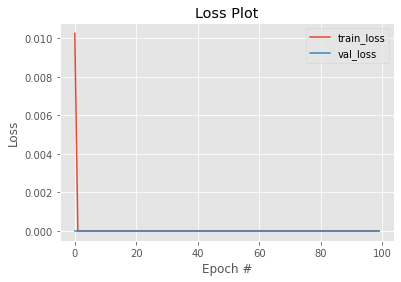

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

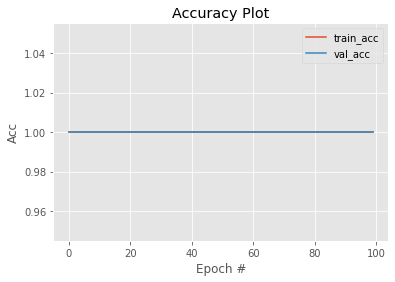

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
#pred = model.predict_classes(x_test)
pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)
print('model 1')
print(classification_report(y_val, labels))

model 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

